## Finding Heavy Traffic Indicator on I-94

In this project, we are going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

We want took analyse the conditions that heavy traffic occurs. 

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head())
print('\n')
print(traffic.tail())
print('\n')
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

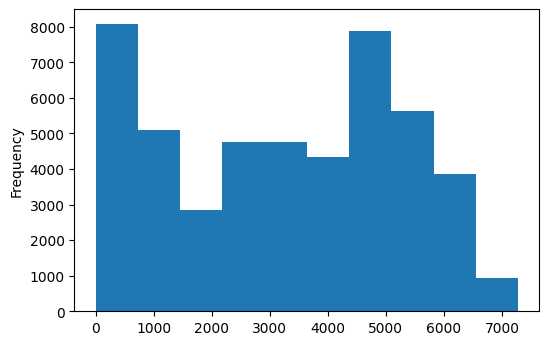

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()

traffic['traffic_volume'].describe()

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

In [3]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


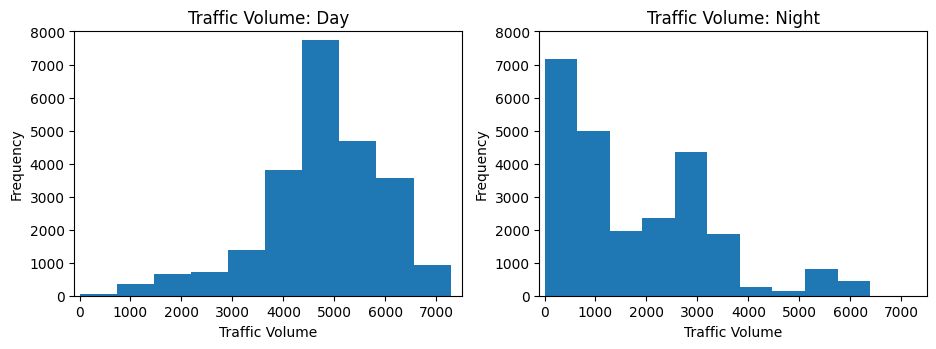

In [4]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume: Day')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume: Night')

plt.show()

In [5]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [7]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

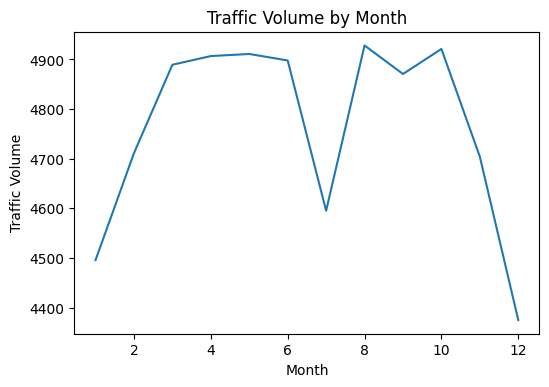

In [8]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

In [9]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

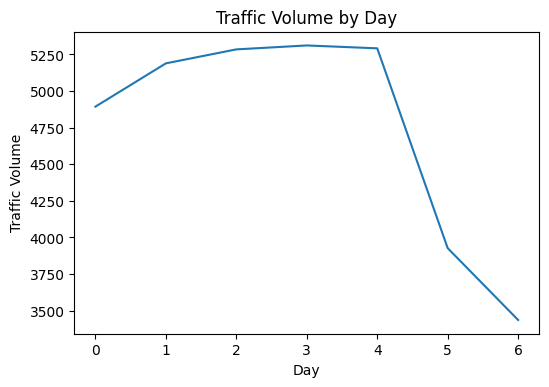

In [10]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by Day')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.show()

In [11]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


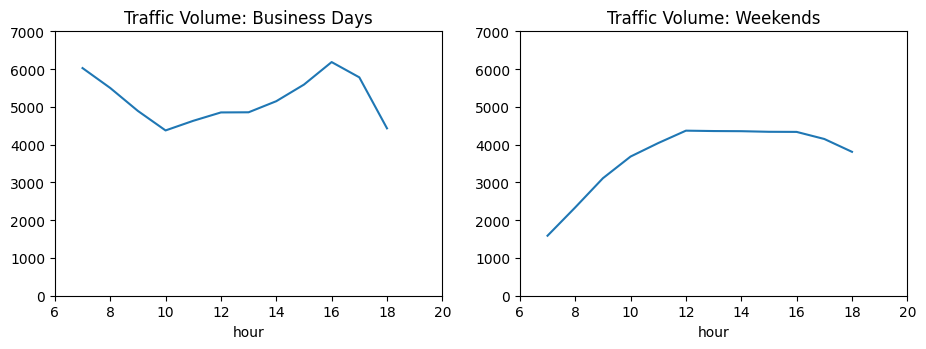

In [15]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,7000)
plt.title('Traffic Volume: Business Days')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,7000)
plt.title('Traffic Volume: Weekends')

plt.show()

As expected, the traffic volume is higher on business days compared to weekends. The rush hours are aroun 7h and 16h, when most people go to work and then come back home. 

In [16]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

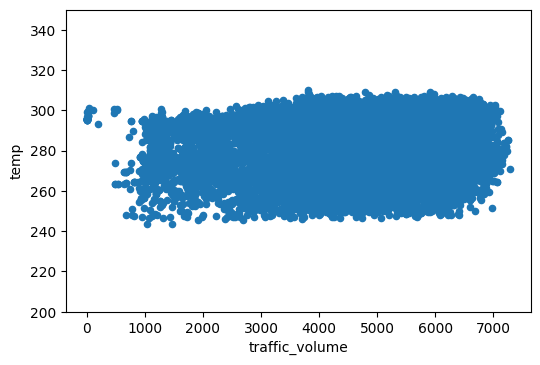

In [20]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200,350)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

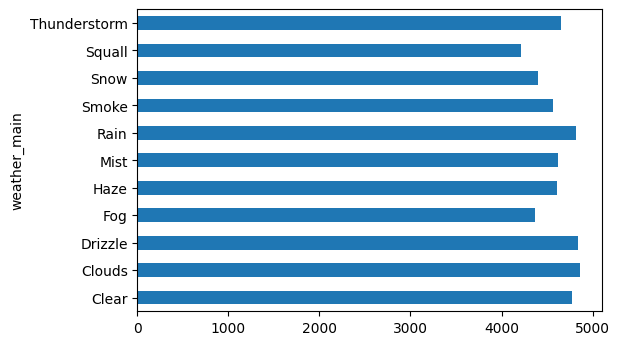

In [25]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there is no traffic volum exceeding 5,000 cars. We can not see any weather type as a heavy traffic indicator.

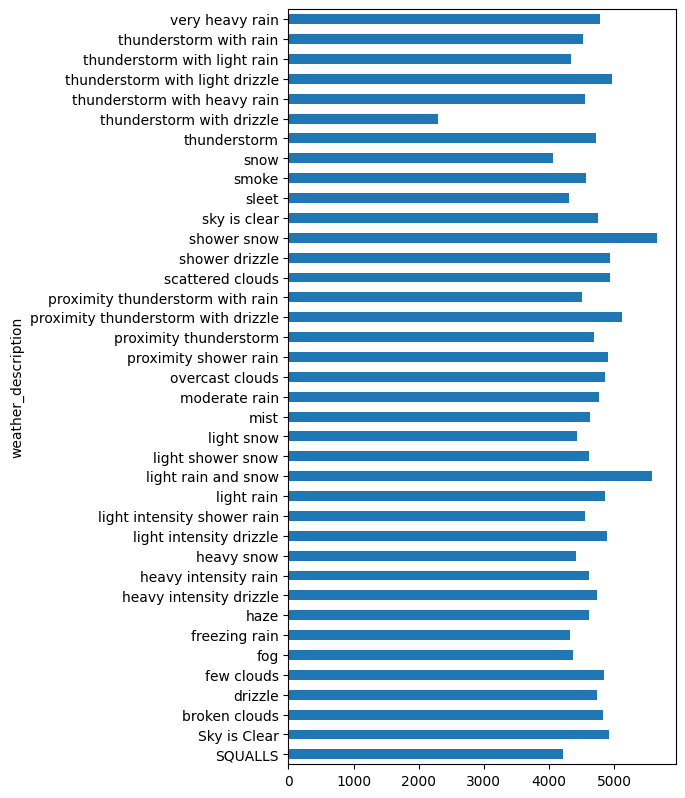

In [34]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Three types of weather exceeds 5,000 cars: Shower Snow, Proximity Thunderstorm with Drizzle and Light Rain and Snow. We can see that they are bad weather, but not so bad. We can think that at those days more people take their cars instead of walking or ryding a bycicle.

### In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators:

    The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    The traffic is usually heavier on business days compared to the weekends.
    On business days, the rush hours are around 7 and 16.
    
#### Weather indicators:

    Shower snow
    Light rain and snow
    Proximity thunderstorm with drizzle